In [1]:
import warnings
import itertools

import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt

import sys
warnings.filterwarnings("ignore") 


In [2]:
from io import StringIO
import requests

url = 'http://www.ucanalytics.com/blogs/wp-content/uploads/2015/06/Tractor-Sales.csv'
s = requests.get(url).text

df = pd.read_csv(StringIO(s))
df.head(5)

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [3]:
# since the complete date was not mentioned, we assume that it was the first of every month
dates = pd.date_range(start='2003-01-01', freq='MS', periods=len(df))

In [4]:
import calendar
df['Month'] = dates.month
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
df['Year'] = dates.year

In [5]:
df.drop(['Month-Year'], axis=1, inplace=True)
df.rename(columns={'Number of Tractor Sold':'Tractor-Sales'}, inplace=True)
df = df[['Month', 'Year', 'Tractor-Sales']]

In [6]:
# set the dates as the index of the dataframe, so that it can be treated as a time-series dataframe
df.set_index(dates, inplace=True)

In [7]:
# check out first 5 samples of the data
df.head(5)

,Month,Year,Tractor-Sales
2003-01-01,Jan,2003,141
2003-02-01,Feb,2003,157
2003-03-01,Mar,2003,185
2003-04-01,Apr,2003,199
2003-05-01,May,2003,203


In [8]:
df.isnull().sum()

Month            0
Year             0
Tractor-Sales    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(144, 3)

In [11]:
# extract out the time-series
df_ts = df['Tractor-Sales']

Text(0, 0.5, 'Tractor Sales')

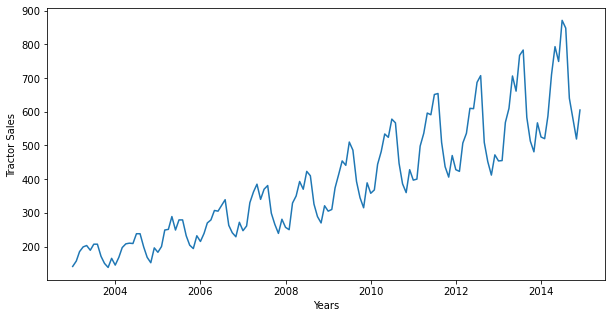

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(df_ts)
plt.xlabel('Years')
plt.ylabel('Tractor Sales')

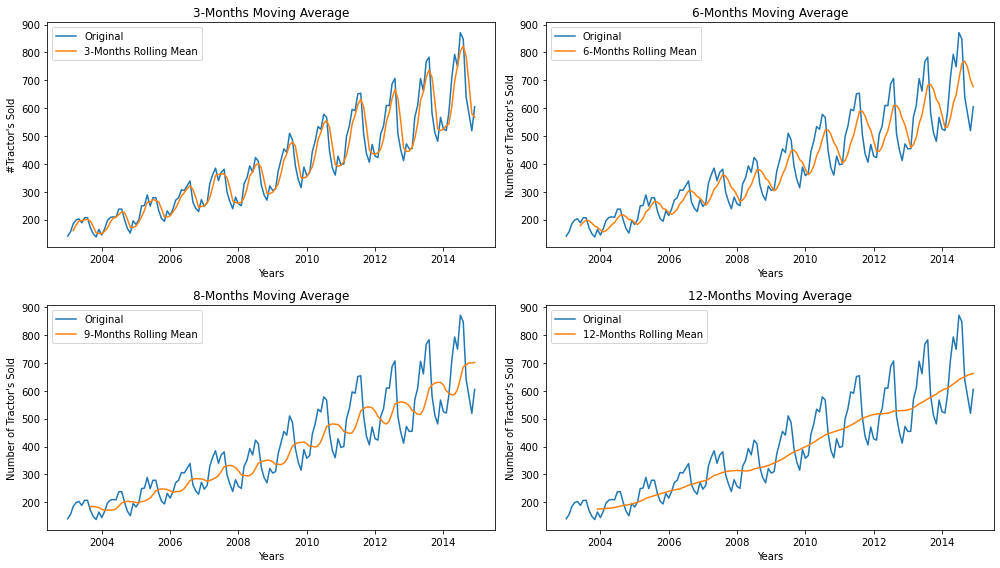

In [13]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)
axes[0][0].plot(df_ts.index, df_ts, label='Original')
axes[0][0].plot(df_ts.index, df_ts.rolling(window=3).mean(), label='3-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("#Tractor's Sold")
axes[0][0].set_title("3-Months Moving Average")
axes[0][0].legend(loc='best')
axes[0][1].plot(df_ts.index, df_ts, label='Original')
axes[0][1].plot(df_ts.index, df_ts.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Number of Tractor's Sold")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')
axes[1][0].plot(df_ts.index, df_ts, label='Original')
axes[1][0].plot(df_ts.index, df_ts.rolling(window=9).mean(), label='9-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Number of Tractor's Sold")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')
axes[1][1].plot(df_ts.index, df_ts, label='Original')
axes[1][1].plot(df_ts.index, df_ts.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Number of Tractor's Sold")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')
plt.tight_layout()
plt.show()

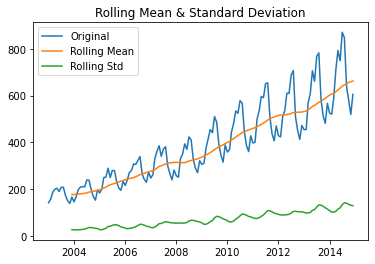

In [14]:
#Determing rolling statistics
rolmean = df_ts.rolling(window=12).mean()
rolstd = df_ts.rolling(window=12).std()

#Plot rolling statistics:
orig = plt.plot(df_ts, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

Dickey-Fuller Test - Let's run the Dicky Fuller Test on the timeseries and verify the null hypothesis that the TS is non-stationary.

In [15]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(df_ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   1.108825
p-value                          0.995291
#lags Used                      14.000000
Number of Observations Used    129.000000
Critical Value (1%)             -3.482088
Critical Value (5%)             -2.884219
Critical Value (10%)            -2.578864
dtype: float64


In [16]:
monthly_sales = pd.pivot_table(df, values = "Tractor-Sales", columns = "Year", index = "Month")
monthly_sales = monthly_sales.reindex(index = 
['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Mar,185,197,249,270,330,329,374,444,498,507,568,587
Apr,199,208,251,279,362,350,414,482,536,536,610,710
May,203,210,289,307,385,393,454,534,596,610,706,793
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Sep,171,199,232,263,299,326,393,447,509,509,583,640


<AxesSubplot:xlabel='Month'>

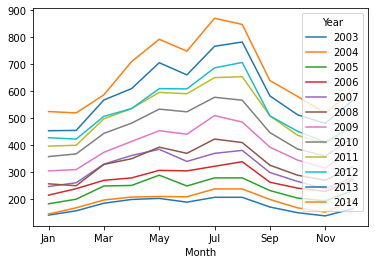

In [17]:
monthly_sales.plot()

In [18]:
yearly_sales = pd.pivot_table(df, values = "Tractor-Sales", columns = "Month", index = "Year")
yearly_sales = yearly_sales[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2003,141,157,185,199,203,189,207,207,171,150,138,165
2004,145,168,197,208,210,209,238,238,199,168,152,196
2005,183,200,249,251,289,249,279,279,232,204,194,232
2006,215,239,270,279,307,305,322,339,263,241,229,272
2007,247,261,330,362,385,340,370,381,299,266,239,281
2008,257,250,329,350,393,370,423,410,326,289,270,321
2009,305,310,374,414,454,441,510,486,393,345,315,389
2010,358,368,444,482,534,524,578,567,447,386,360,428
2011,397,400,498,536,596,591,651,654,509,437,406,470


<AxesSubplot:xlabel='Year'>

<Figure size 576x1296 with 0 Axes>

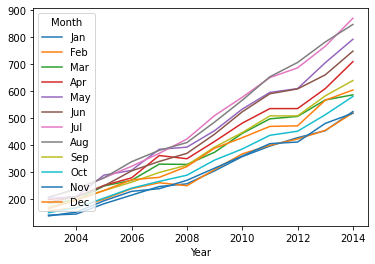

In [19]:
# fig.set_figwidth(18)
# fig.set_figheight(12)
plt.figure(figsize=(8,18))
yearly_sales.plot()

<AxesSubplot:>

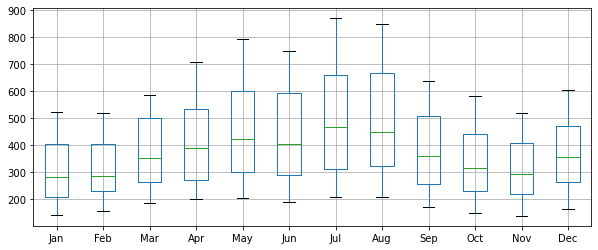

In [20]:
plt.figure(figsize=(10,4))
yearly_sales.boxplot()

In [21]:
decomposition = sm.tsa.seasonal_decompose(df_ts, model='multiplicative')

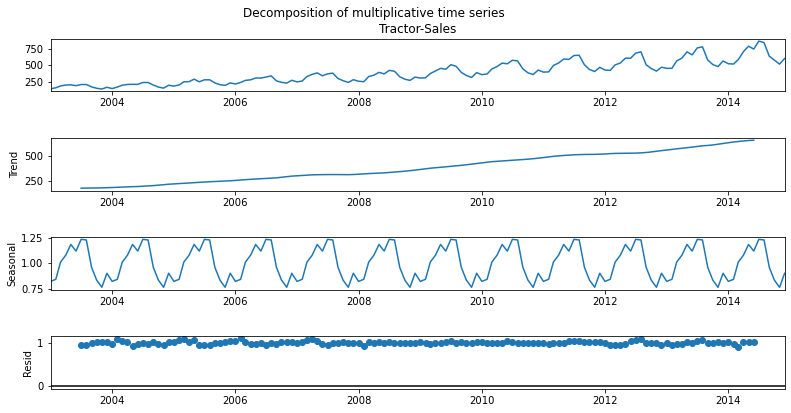

In [22]:
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(6)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

Text(0, 0.5, 'Tractor Sales')

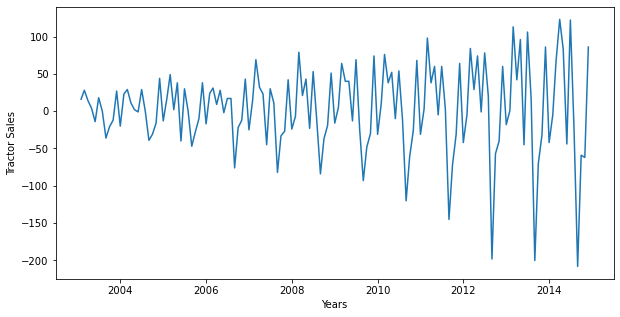

In [23]:
#1st Order Differencing
plt.figure(figsize=(10, 5))
plt.plot(df_ts.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Tractor Sales')

Text(0, 0.5, 'Log (Tractor Sales)')

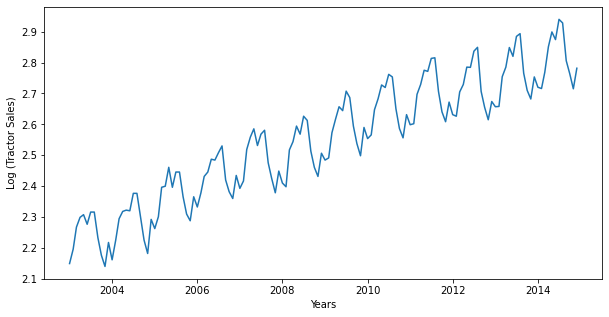

In [24]:
#Since Variance is not stationary on differencing checking the variance using log

plt.figure(figsize=(10, 5))
plt.plot(np.log10(df_ts))
plt.xlabel('Years')
plt.ylabel('Log (Tractor Sales)')

Text(0, 0.5, 'Differenced Log (Tractor Sales)')

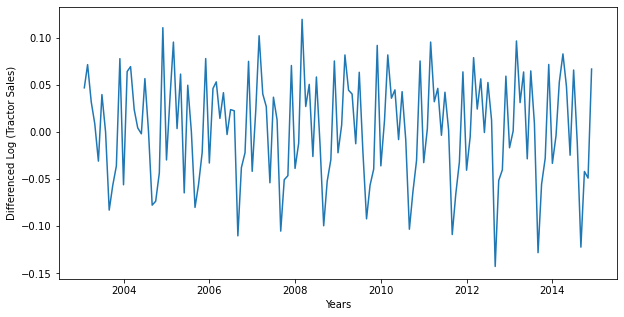

In [25]:
#Since variance is stationary on log, Applying lograthmic differencing of order = 1
plt.figure(figsize=(10, 5))
plt.plot(np.log10(df_ts).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Tractor Sales)')

In [26]:
df_ts_log = np.log10(df_ts)
df_ts_log.dropna(inplace=True)

df_ts_log_diff = df_ts_log.diff(periods=1) # same as ts_log_diff = ts_log - ts_log.shift(periods=1)
df_ts_log_diff.dropna(inplace=True)

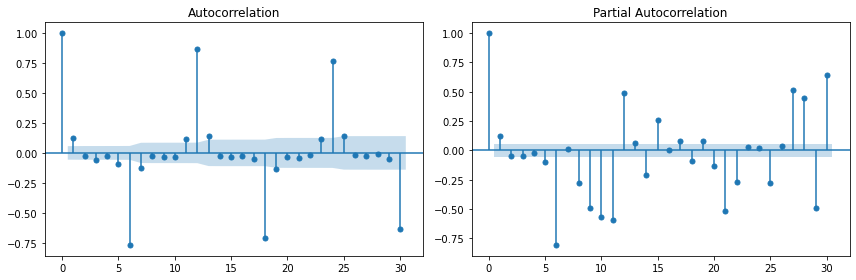

In [27]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(df_ts_log_diff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(df_ts_log_diff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

In [28]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [29]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(df_ts_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 model - AIC:-733.7742857190799


In [30]:
best_model = sm.tsa.statespace.SARIMAX(df_ts_log,
                                      order=(0, 1, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=True,
                                      enforce_invertibility=True)
best_results = best_model.fit()
best_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                      Tractor-Sales   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 370.887
Date:                            Mon, 10 Jan 2022   AIC                           -733.774
Time:                                    17:00:58   BIC                           -721.923
Sample:                                01-01-2003   HQIC                          -728.958
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3571      0.069     -5.191      0.000      -0.492      -0.222
ar.S.L12       0.9933      0.006    175.722      0.000       0.982       1.004
ma.S.L12      -0.5524      0.097     -5.723      0.000      -0.742      -0.363
sigma2         0.0003   2.73e-05      9.222      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 1.45
Prob(Q):                              0.86   Prob(JB):                         0.48
Heteroskedasticity (H):               0.64   Skew:                             0.04
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2012-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [32]:
# Extract the predicted and true values of our time series
df_ts_forecasted = pred_dynamic.predicted_mean
df_ts_truth = df_ts_log['2012-01-01':]

# Compute the mean square error
mse = ((df_ts_forecasted - df_ts_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

The Mean Squared Error of our forecasts is 0.0011


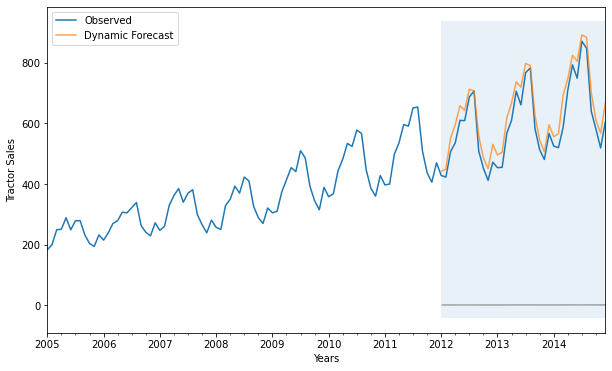

In [33]:
axis = df_ts['2005':].plot(label='Observed', figsize=(10, 6))
np.power(10, pred_dynamic.predicted_mean).plot(ax=axis, label='Dynamic Forecast', alpha=0.7)
axis.fill_between(pred_dynamic_ci.index, pred_dynamic_ci.iloc[:, 0], pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
axis.fill_betweenx(axis.get_ylim(), pd.to_datetime('2012-01-01'), df_ts.index[-1], alpha=.1, zorder=-1)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [34]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [35]:
n_steps = 36
idx = pd.date_range(df_ts.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                    index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2014-12-01,567.461209,528.222560,609.614673,528.222560,609.614673
2015-01-01,566.183805,519.949873,616.528857,519.949873,616.528857
2015-02-01,668.749573,607.021508,736.754770,607.021508,736.754770
2015-03-01,755.208161,678.408099,840.702473,678.408099,840.702473
2015-04-01,850.235395,756.568223,955.499062,756.568223,955.499062


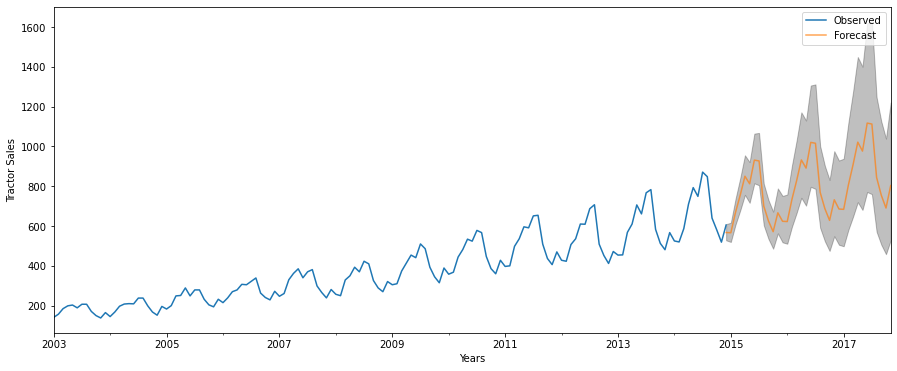

In [36]:
# plot the forecast along with the confidence band
axis = df_ts.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
#axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.75)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()

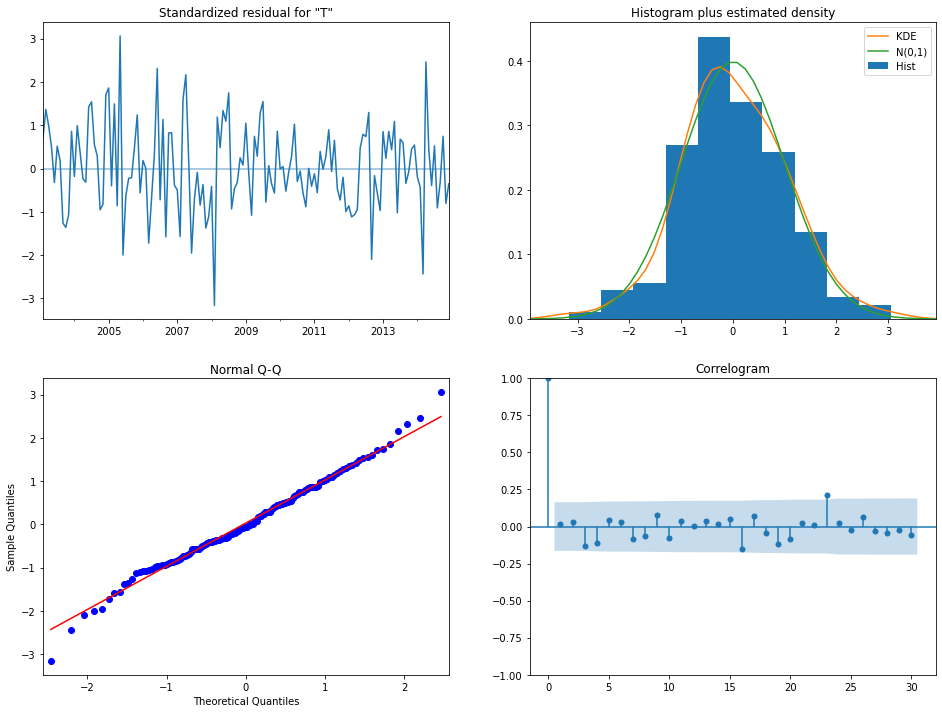

In [37]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()